In [4]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.HANDLING MISSING VALUES


#### Rule 1:
 - Threshold value : 25% or more than 25% missing data
 
  Approach: remove that particular column or row from the data
  
#### Rule 2:

 - Less than25% missing data
  Approach:
 - a) Check Variable type(Number or chat)
      - Variable type - character/object
           - Approach : Mode(Most frequent occurences)
      - variable type : number(int or float)
          - Apprach :
                  - Outlier found - "Median"
                  - Outlier not found - " Mean"

## 2.HANDLING OUTLIER

## (only applicable for numberic values)
#### Rule 1 

 - Threshold value : 25% or more than 25% outlier found
     - Approach: approach - check with your stakeholder/client whether we can remove that outlier or not
     - Answer: Keep or Remove
     
      - keep - approach - Transformation approach
         Transaformation approach (either more than 25% or less then 25%)
         - a) square root transformation
         - b) cube root transformation
         - c) log transformation
         - d) i) positive outlier = Q3 + 1.5 * IQR ii) Negetive outlier = Q1 - 1.5 *IQR
         - e) to do feature scaling (standarisation)

         - Advanced tech - Regularisation approach - Lasso / Ridge / ElasticNet method
         - 

## 3. HANDLING ENCONDING

## (only applicable for char/object DT)
significant/dependent variable which is a character/object
convert char to number
- **step 1**
    - Label Encoder : convert char to number in sequence number
- **step 2**
    - one hot Encoder: connvert all number into induvidual variable and then assign binary value(0,1)
- **step 3**
    - Dummy variable: remove one variable n-1
        - Why are doing this step?
            - To remove multi-colinearity

## 4. FEATURE SCALING

- Approach 1: Standardiation
- Approach 2  - Normalisation

**Standardisation**

- When there is an outlier, this approach should use and it's range is -3 to 3

**Normalisation**
- when there is no outlier, this approach should use and its range is  0 to 1

## 5. IMBALANCE DATA SET

In [ ]:
 **Only applicable for classification problem, why because we have level data(output variable as yes/No,0/1,True/False) given**

# 1. Handling Missing Values

In [45]:
titanic = pd.read_csv('C:/Users/dasar/Desktop/Selva_Git_repo/Data_Science/Stats/CSV FILES/titanic.csv')
titanic.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [47]:
titanic.shape

(1309, 8)

In [55]:
titanic.isnull().sum()

Pclass        0
Gender        0
Age         263
SibSp         0
ParCh         0
Fare          1
Embarked      2
Status        0
dtype: int64

In [57]:
# calculating the percentage of missing values in the dataset

titanic.isnull().sum()/len(titanic)*100

Pclass       0.000000
Gender       0.000000
Age         20.091673
SibSp        0.000000
ParCh        0.000000
Fare         0.076394
Embarked     0.152788
Status       0.000000
dtype: float64

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


<AxesSubplot:ylabel='Age'>

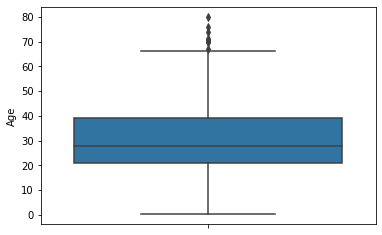

In [52]:
sns.boxplot(y ='Age', data = titanic)


# positive outliers are indicated in the boxplot
# so median is the best approach to fill the null values

In [82]:
titanic['Age']= titanic['Age'].fillna(value= titanic['Age'].median)
titanic.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
ParCh       0
Fare        1
Embarked    2
Status      0
dtype: int64

<AxesSubplot:xlabel='Fare'>

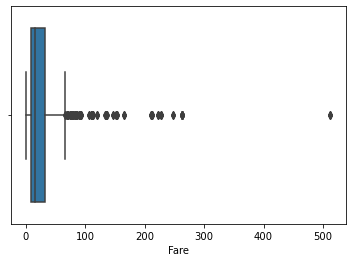

In [83]:
sns.boxplot(x = titanic['Fare'])

# Fare is an int variable
# From box plot, we found that positive outliers in Fare variable
# fill the null values with median

In [92]:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median)
titanic.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
ParCh       0
Fare        0
Embarked    0
Status      0
dtype: int64

In [89]:
# Embarked is a categorical variable
# fill the null values with Most repeated Values (MODE)

titanic['Embarked'].value_counts()

Southampton    914
Cherbourg      270
Queenstown     123
Name: Embarked, dtype: int64

In [90]:
titanic['Embarked'] =titanic['Embarked'].fillna('Southampton')
titanic.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
ParCh       0
Fare        0
Embarked    0
Status      0
dtype: int64

In [116]:
ed = pd.read_excel('C:/Users/dasar/Desktop/Selva_Git_repo/Data_Science/Stats/CSV FILES/Employee_Data.xls')
ed


,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [118]:
ed.shape

(100, 7)

In [119]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [139]:
ed1 = ed.copy()
ed1

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [142]:
ed1['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [143]:
# fill the null values in Department variable with most repeated values i.e, Sales and Marketing
ed1['Department'] = ed1['Department'].fillna('Sales and Marketing')
ed1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

C:\Users\dasar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

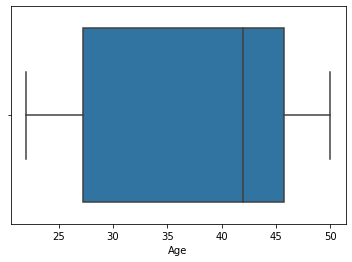

In [127]:
sns.boxplot(ed['Age'])

C:\Users\dasar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

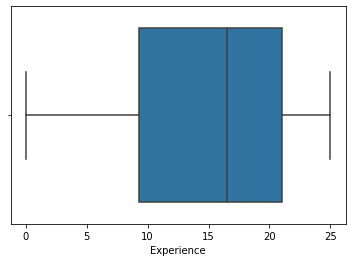

In [128]:
sns.boxplot(ed['Experience'])

In [144]:
# fill the null values in Age and Experincs variables with mean of that variable as there are no outliers

ed1['Age'] = ed1['Age'].fillna(ed1['Age'].mean)
ed1['Experience'] = ed1['Experience'].fillna(ed1['Experience'].mean)


In [145]:
ed1.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [121]:
x = ed.iloc[:,3:6]
x

,Department,Age,Experience
0,Sales and Marketing,28.0,3.0
1,Sales and Marketing,22.0,1.0
2,Customer Relations,22.0,1.0
3,Customer Relations,22.0,1.0
4,Accounting,27.0,0.0
...,...,...,...
95,Sales and Marketing,47.0,22.0
96,Sales and Marketing,46.0,20.0
97,Customer Relations,44.0,18.0
98,Customer Relations,47.0,22.0


In [122]:
x.isnull().sum()

Department    19
Age           18
Experience    10
dtype: int64

In [125]:
# Sklearn library has a module SimpleImputer
# SimpleImputer will handle missing values

from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'most_frequent')
x.iloc[:,0:1] = impute.fit_transform(x.iloc[:,0:1])

In [126]:
x.isnull().sum()

Department     0
Age           18
Experience    10
dtype: int64

In [130]:
y =x.values
y

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, nan],
       ['Customer Relations', 22.0, nan],
       ['Accounting', 25.0, nan],
       ['Accounting', 27.0, nan],
       ['Sales and Marketing', 25.0, nan],
       ['Sales and Marketing', 22.0, nan],
       ['Sales and Marketing', 22.0, nan],
       ['Sales and Marketing', 24.0, nan],
       ['Sales and Marketing', 27.0, nan],
       ['Sales and Marketing', 22.0, nan],
   

In [132]:
pd.DataFrame(y).isnull().sum()

0     0
1    18
2    10
dtype: int64

In [135]:
# There are no outliers in Age and Experience variables
# so, fill the null values with mean or median. but mean is more prefarable when outlier not in dataset

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
y[:,1:3] = imp.fit_transform(y[:,1:3])

In [137]:
pd.DataFrame(y).isnull().sum()

0    0
1    0
2    0
dtype: int64

## 2. Handling Outliers

In [97]:
df = pd.read_excel('C:/Users/dasar/Desktop/Selva_Git_repo/Data_Science/Stats/CSV FILES/DataPreprocessing.xlsx',sheet_name = 'Outlier')
df

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10
8,Marketing,31,2
9,IT,55,35


In [98]:
# checking null vlaues
df.isnull().sum()

Department    0
Age           0
Experience    0
dtype: int64

C:\Users\dasar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

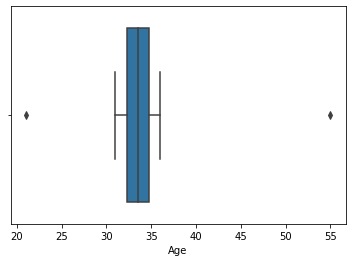

In [99]:
sns.boxplot(df['Age'])

### 2.1 Remove outliers from Dataset 

- using min and max IQR(interquartile range)

In [103]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

C:\Users\dasar\AppData\Local\Temp/ipykernel_11360/3204593830.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


In [104]:
# create a function to handle outliers of any dataset

def outlier_treatment(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3-q1
    res_rem_data = dataframe[~((dataframe<(q1-1.5*IQR))|(dataframe>(q3+1.5*IQR))).any(axis =1)]
    return res_rem_data

In [105]:
outlier_treatment(df)

C:\Users\dasar\AppData\Local\Temp/ipykernel_11360/2704071312.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  res_rem_data = dataframe[~((dataframe<(q1-1.5*IQR))|(dataframe>(q3+1.5*IQR))).any(axis =1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


### 2.2 Square root method

- Change the outlier values by doing square root of that variable to reduce the variances in that variable
- No need to remove data from dataset

In [109]:
df.iloc[:,1:3] = np.sqrt(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,4.582576,1.000000
1,HR,5.744563,3.464102
2,IT,5.916080,3.464102
3,IT,6.000000,3.464102
4,HR,5.830952,3.316625
5,IT,5.744563,3.605551
6,Marketing,5.830952,3.464102
7,HR,5.656854,3.162278
8,Marketing,5.567764,1.414214
9,IT,7.416198,5.916080


### 2.3 Cube root method

- Change the outlier values by doing cube root of that variable to reduce the variances in that variable
- No need to remove data from dataset

In [110]:
df.iloc[:,1:3] = np.cbrt(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,1.661001,1.000000
1,HR,1.790959,1.513086
2,IT,1.808609,1.513086
3,IT,1.817121,1.513086
4,HR,1.799892,1.491301
5,IT,1.790959,1.533406
6,Marketing,1.799892,1.513086
7,HR,1.781797,1.467799
8,Marketing,1.772394,1.122462
9,IT,1.950116,1.808609


### 2.4 Log Transformation method

- Change the outlier values by doing log of that variable to reduce the variances in that variable
- No need to remove data from dataset

In [112]:
df.iloc[:,1:3] = np.log10(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,0.220370,0.000000
1,HR,0.253086,0.179864
2,IT,0.257345,0.179864
3,IT,0.259384,0.179864
4,HR,0.255246,0.173565
5,IT,0.253086,0.185657
6,Marketing,0.255246,0.179864
7,HR,0.250858,0.166667
8,Marketing,0.248560,0.050172
9,IT,0.290060,0.257345


## 5. Imbalance Data set

In [5]:
credit = pd.read_csv('C:/Users/dasar/Desktop/Selva_Git_repo/Data_Science/Stats/CSV FILES/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.shape

(284807, 31)

In [7]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

###### It is an imbalalnced dataset
    majority - 0 -284315
    minority - 1 - 492

To make it balanced data set, we follow below approaches
- UnderSampling
- OverSampling (Best preferable approach)
- SMOTE

In [30]:
!pip install imblearn

In [2]:
import imblearn

## UnderSampling Method

- Here Majority class reduced to Minority class count
- majority - 0 -284315
- minority - 1 - 492

- After undersampling,
- majority - 0 - 492
- minority - 1 - 492

In [6]:
x = credit.iloc[:,0:30]
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
y= credit.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## UnderSampling Method

In [38]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
x_un,y_un = under.fit_resample(x,y)

In [43]:
print(x_un.shape)
print(y_un.shape)

(984, 30)
(984,)


## OverSampling Method

- Here Minority class increased to Majority class count
- majority - 0 -284315
- minority - 1 - 492

- After undersampling,
- majority - 0 - 284315
- minority - 1 - 284315

## OverSampling Method

In [39]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_ov,y_ov = over.fit_resample(x,y)

In [44]:
print(x_ov.shape)
print(y_ov.shape)

(568630, 30)
(568630,)


## SMOTE - Synthetic Minority Over-Sampling Technique

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(x,y)

In [9]:
print(x_sm.shape)
print(y_sm.shape)

(568630, 30)
(568630,)
